# Neural Networks

# I. Overview

### Objective
Understand and implement linear and logistic regression using neural networks, and using cross validation to improve the accuracy of these models given the data.

### Tasks Performed
1. Performed exploratory data analysis on regression and classification data.
2. Pre-processed the data (ex, performed one-hot encoding for categorical columns).
3. Performed cross-validation and found the best parameters to fit the model to the data.
4. Analyzed the models and visualized the results.

# II. Data

## Regression Data
### Introduction
This is a regression dataset for determining whether the price of houses. It has been taken from Kaggle datasets (https://www.kaggle.com/shivachandel/kc-house-data). Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015.
### Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, \
    mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [2]:
data_regression = pd.read_csv('kc_house_data.csv')

In [3]:
data_regression.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [4]:
print('T: ', 'price')
print('Rows: ', len(data_regression))
print('Columns: ', len(data_regression.columns))

T:  price
Rows:  21613
Columns:  21


In [5]:
data_regression.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data_regression.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
data_regression.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

The data looks clean, and therefore does not seem to need any pre-processing. However, based on earlier analysis, here are some pre-processing steps that are being performed:
1. Setting the index to the 'id' column. 
2. Adding a new column for cumulative number of bedrooms and bathrooms.
3. Removing the sqft_living15 and sqft_lot15 features since their significance seems to have been captured already in sqft_living and sqft_lot, based on the correlation. Also removing the individual number of bedrooms, number of and bathrooms.

In [8]:
data_regression.set_index('id', inplace=True)

In [9]:
data_regression['no_of_bedrooms_and_bathrooms'] = data_regression['bathrooms'] \
+ data_regression['bedrooms']

In [10]:
data_regression.drop(columns={'sqft_living15', 'sqft_lot15', 
                              'bathrooms', 'bedrooms'}, inplace=True)

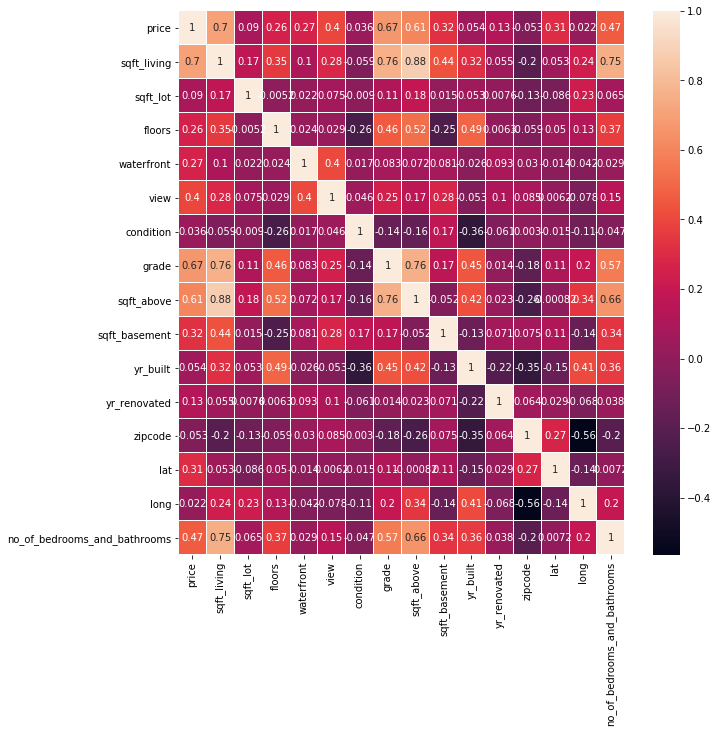

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_regression.corr(), annot=True, linewidths=.1, ax=ax)
plt.show()

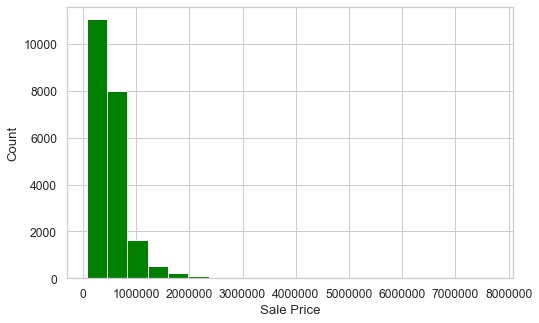

In [12]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data_regression['price'], norm_hist=False, kde=False, bins=20, color=['green'], hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

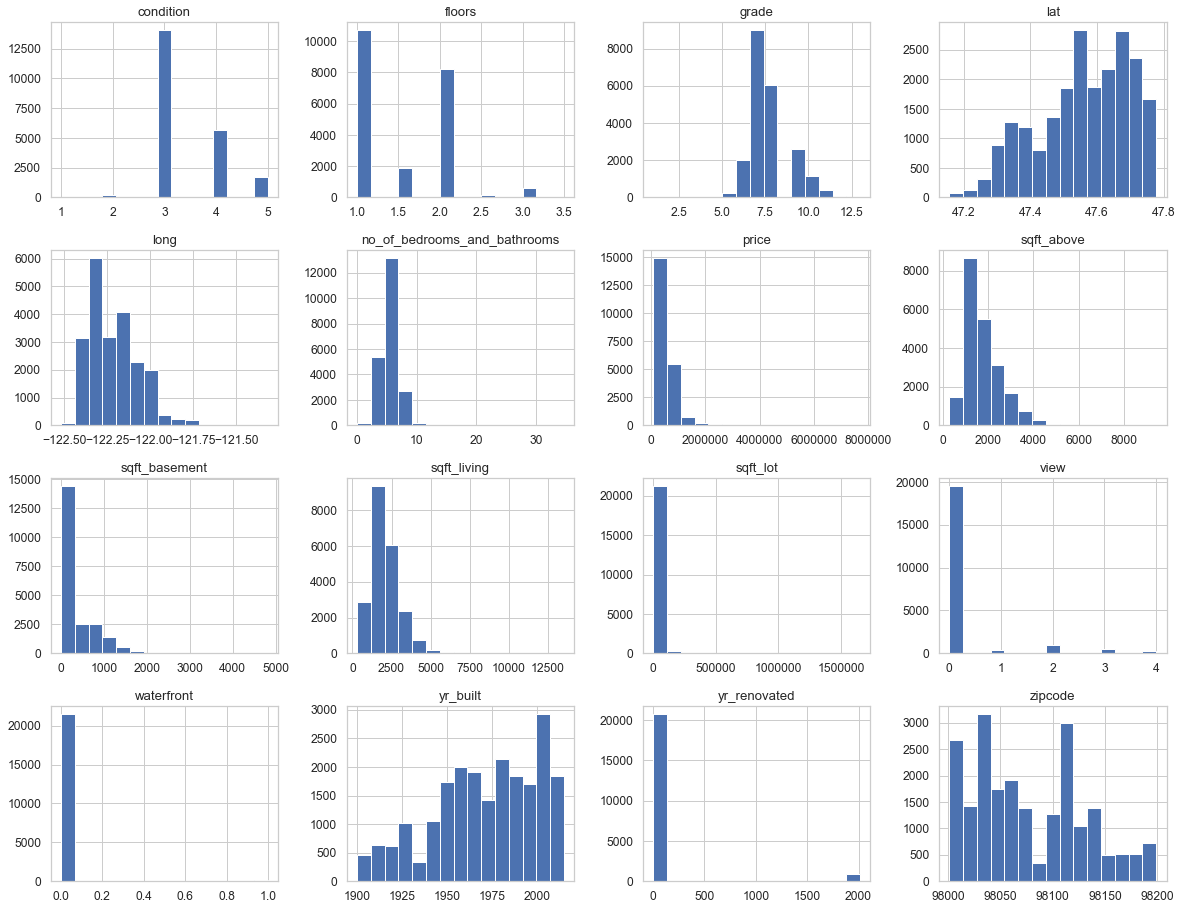

In [13]:
data_regression.select_dtypes(include='number').hist(bins=15, figsize=(20, 20), layout=(5, 4));

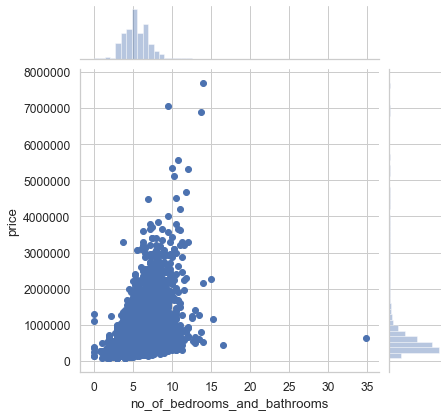

In [14]:
sns.jointplot(x=data_regression['no_of_bedrooms_and_bathrooms'], y=data_regression['price']);

The price seems to show an increasing trend when the number of bedrooms and the number of bathrooms are added together as a feature.

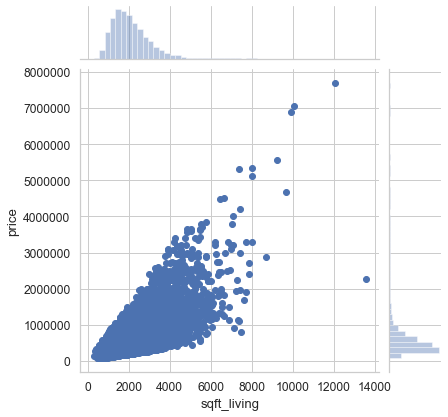

In [15]:
sns.jointplot(x=data_regression['sqft_living'], y=data_regression['price']);

The price shows a clear increasing trend with the sqft_living feature.

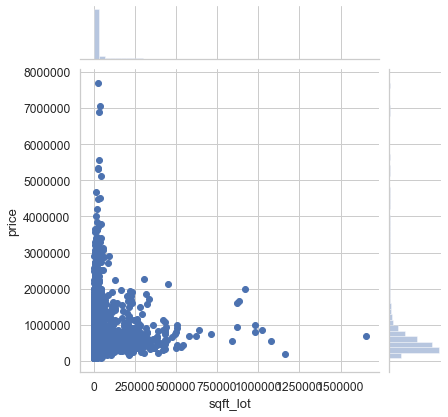

In [16]:
sns.jointplot(x=data_regression['sqft_lot'], y=data_regression['price']);

Both price and sqft_lot are skewed towards a tail.

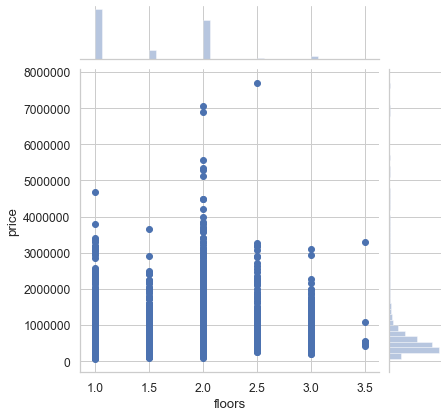

In [17]:
sns.jointplot(x=data_regression['floors'], y=data_regression['price']);

It seems like the number of floors does not have a clear relationship with the price.

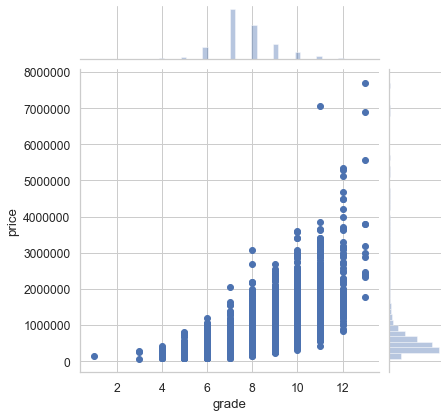

In [18]:
sns.jointplot(x=data_regression['grade'], y=data_regression['price']);

The grade definitely shows an increasing trend for predicting the price of the house.

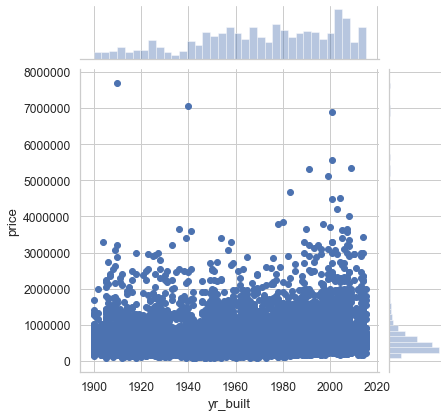

In [19]:
sns.jointplot(x=data_regression['yr_built'], y=data_regression['price']);

The year the house was built does not seem to have a correlation with the price of the house.

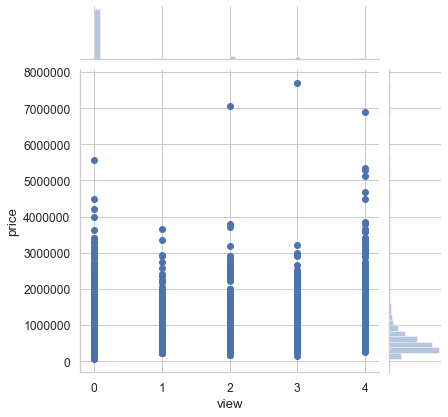

In [20]:
sns.jointplot(x=data_regression['view'], y=data_regression['price']);

The rating of the view outside the house seems to show a positive trend with the price.

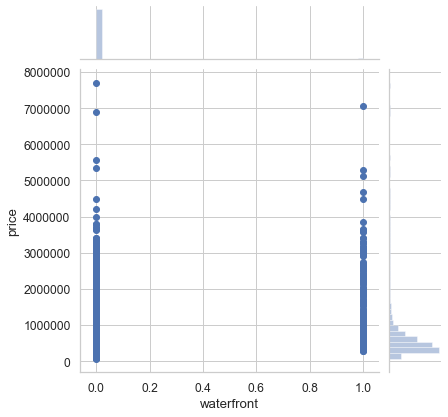

In [21]:
sns.jointplot(x=data_regression['waterfront'], y=data_regression['price']);

Having a waterfront does seem to have an effect on the house price.
### Main observations
1. The sale price is generally skewed towards 0 to 1 million, and therefore it might be harder to predict the prices of houses that might be more expensive than that.
2. The combined number of bedrooms and bathrooms also show a positive association with the house prices.
3. The sqft_living shows a positive association with the house prices.
4. The grade given to a property shows a positive association with the price.

## Classification Data
### Introduction
This is a classification dataset for determining whether the Loan Status of individuals, which is either Fully Paid or Charged Off. It has been taken from Kaggle datasets (https://www.kaggle.com/zaurbegiev/my-dataset) and although the documentation of where is was taken from is scarce, the readability of the features is good.
### Visualization

In [22]:
data_classification = pd.read_csv('credit_train.csv', index_col=False)

In [23]:
data_classification.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0


In [24]:
data_classification.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


There are some null values, removing them should be okay because there are still enough observations....

In [25]:
data_classification.dropna(how="any", inplace=True)

In [26]:
print('T: ', 'Loan Status')
print('Rows: ', len(data_classification))
print('Columns: ', len(data_classification.columns))

T:  Loan Status
Rows:  36423
Columns:  19


In [27]:
data_classification['Fully Paid'] = (data_classification['Loan Status'] == 'Fully Paid')
data_classification['Short Term'] = (data_classification['Term'] == 'Short Term')

In [28]:
for col in ['Fully Paid', 'Short Term']:
    data_classification = data_classification.astype({col:'int32'}, copy=False)

Removing string columns that have been converted...

In [29]:
data_classification.drop(columns=['Loan Status', 'Term'], inplace=True)

Renaming columns for better use in code...

In [30]:
for col in data_classification.columns:
    x = col.split()
    y = ''
    for i in x:
        y += i.lower()+'_'
    y = y[:-1]
    data_classification.rename(columns={col:y}, inplace=True)

In [31]:
data_classification.head(2)

,loan_id,customer_id,current_loan_amount,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,fully_paid,short_term
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,99999999.0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1,1
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,217646.0,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,1,1


In [32]:
data_classification.corr()['fully_paid'].sort_values()

credit_score                   -0.467169
number_of_open_accounts        -0.025361
monthly_debt                   -0.016347
tax_liens                      -0.012883
number_of_credit_problems      -0.005907
bankruptcies                    0.003085
maximum_open_credit             0.006955
current_credit_balance          0.008538
months_since_last_delinquent    0.016191
years_of_credit_history         0.030938
annual_income                   0.059817
short_term                      0.105298
current_loan_amount             0.200122
fully_paid                      1.000000
Name: fully_paid, dtype: float64

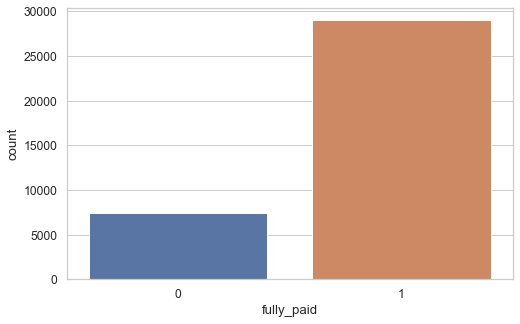

In [33]:
sns.countplot(data_classification['fully_paid']);

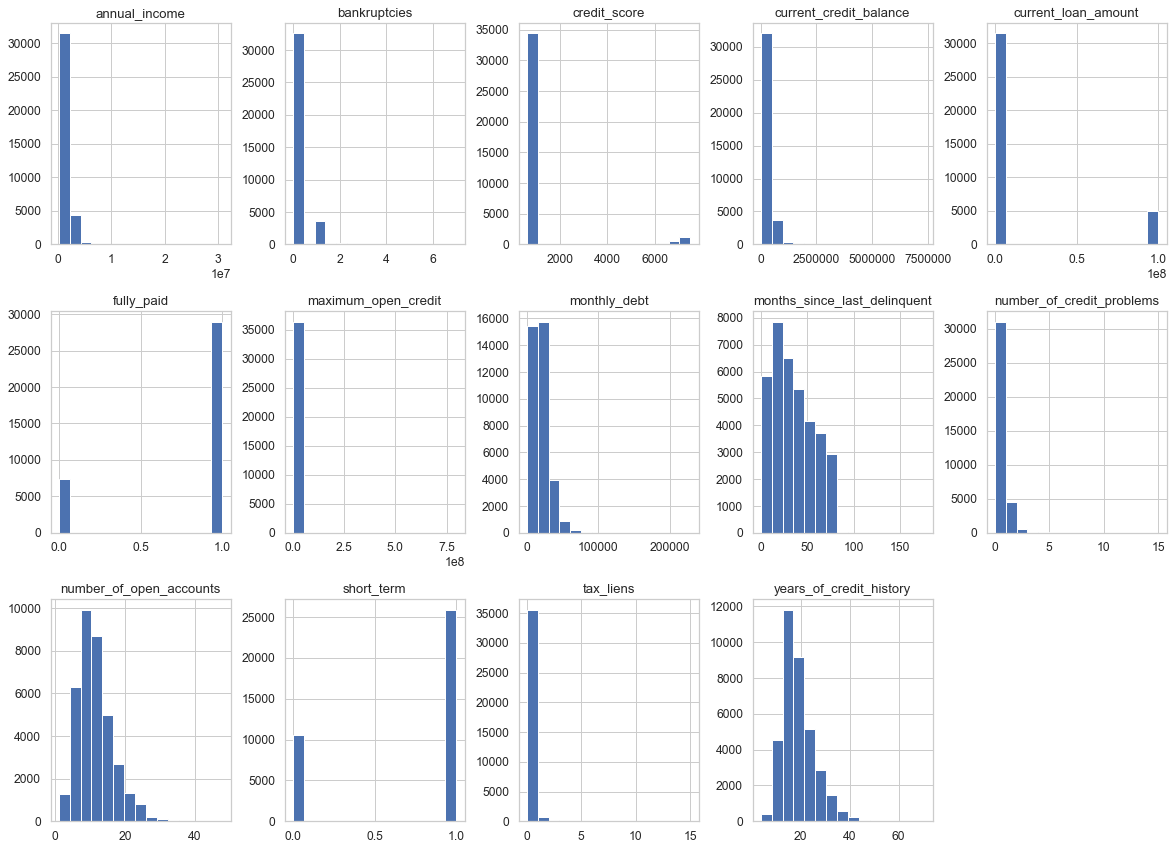

In [34]:
data_classification.select_dtypes(include='number').hist(bins=15, figsize=(20, 20), layout=(4, 5));

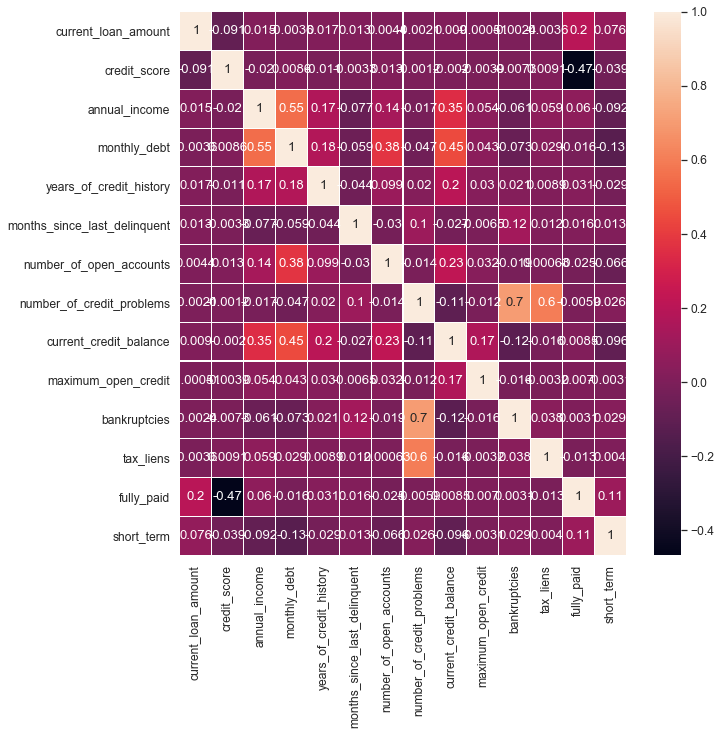

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_classification.corr(), annot=True, linewidths=.1, ax=ax)
plt.show()

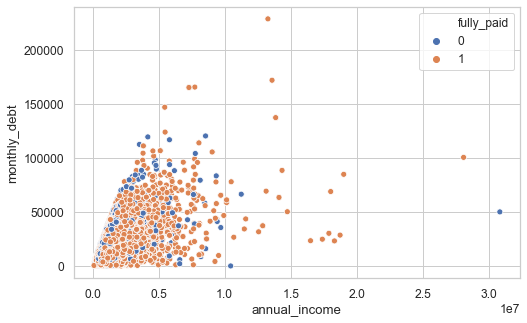

In [36]:
sns.scatterplot(x="annual_income", y="monthly_debt", hue="fully_paid", data=data_classification);

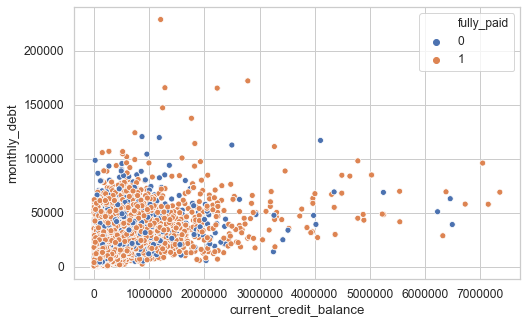

In [37]:
sns.scatterplot(x="current_credit_balance", y="monthly_debt", hue="fully_paid", data=data_classification);

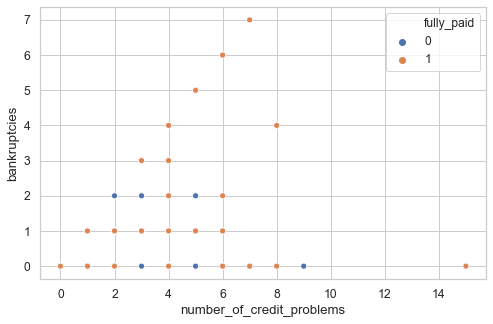

In [38]:
sns.scatterplot(x="number_of_credit_problems", y="bankruptcies", hue="fully_paid", data=data_classification);

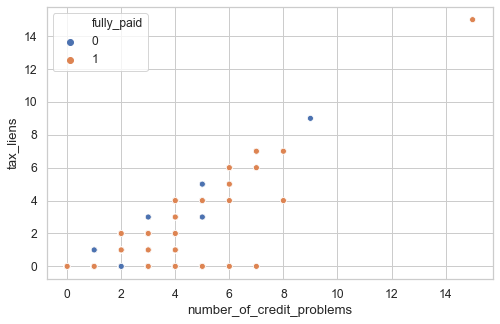

In [39]:
sns.scatterplot(x="number_of_credit_problems", y="tax_liens", hue="fully_paid", data=data_classification);

### Observations
1. The credit score for most of the participants is high. However this seems to have no effect on the ability of paying off the loan. Interpreting this might be an issue, since we actually have more data for fully paid loans.
2. The months since the person was last delinquent does not seem to have an effect on the loan payment.
3. A higher annual income even with a higher monthly debt shows a trend towards better fully paid loans.

## Pre-processing regression and classification data for use later

In [40]:
# regression
data = data_regression.sample(10000, random_state = 1)

X = data[['sqft_living', 'no_of_bedrooms_and_bathrooms', 'grade', 'condition', 'waterfront']].copy()
T = data['price'].copy()

X_train_regression = np.array(X.iloc[:8000])
T_train_regression = np.array(T.iloc[:8000])

X_test_regression = np.array(X.iloc[8000:])
T_test_regression = np.array(T.iloc[8000:])

# classification
positive_samples = data_classification[data_classification.fully_paid == 1]
negative_samples = data_classification[data_classification.fully_paid == 0]
data = positive_samples.sample(n = 5000, random_state = 1)
data = pd.concat([data, negative_samples.sample(n = 5000, random_state = 1)])
data = data.sample(frac=1)

X = data[['annual_income', 'monthly_debt', 'current_credit_balance', 'credit_score',\
          'current_loan_amount', 'short_term', 'number_of_open_accounts',\
          'monthly_debt']].copy()
T = data[['fully_paid']].copy()

X_train_classification = np.array(X.iloc[:8000,:])
T_train_classification = np.array(T.iloc[:8000,:])

X_test_classification = np.array(X.iloc[8000:,:])
T_test_classification = np.array(T.iloc[8000:,:])

In [41]:
print(X_train_regression.shape)
T_train_regression.resize((8000, 1))
print(T_train_regression.shape)
print(X_train_classification.shape)
print(T_train_classification.shape)

(8000, 5)
(8000, 1)
(8000, 8)
(8000, 1)


# III. Methods

## III. 5-fold Cross Validation

### Introduction: Cross Validation
Cross validation is the method of dividing up the training data into a certain number of folds, and then train on different folds to see which fold can give the best training and validation accuracies for prediction. For 5-fold cross validation, we would divide the data into 5 sets, use the first 1 for testing, next 1 for validation, and last 3 for training. Then we would shuffle or rotate between these sets. Cross validaton allows us to choose the best parameters that learn best from the given training data while not being underfitted or overfitted.

In [42]:
final_acc_list = []
best_params_list = []

def CrossValidation(train_data, train_target, parameters, folds = 5):
    testing_data_size = int(len(train_data)/5)
    
    records = []
    params = []
    for fold in range(folds):
        test_fold_data = train_data[testing_data_size*(fold):testing_data_size*(fold+1)]
        test_fold_target = train_target[testing_data_size*(fold):testing_data_size*(fold+1)]
        
        a = train_data[:testing_data_size*(fold)]
        b = train_data[testing_data_size*(fold+1):]
        train_fold_data_interim = np.concatenate((a, b), axis=0)
        c = train_target[:testing_data_size*(fold)]
        d = train_target[testing_data_size*(fold+1):]
        train_fold_target_interim = np.concatenate((c, d), axis=0)
        
        for val_fold in range(folds-1):
            val_fold_data = train_fold_data_interim[testing_data_size*(val_fold):testing_data_size*(val_fold+1)]
            val_fold_target = train_fold_target_interim[testing_data_size*(val_fold):testing_data_size*(val_fold+1)]
            
            a = train_fold_data_interim[:testing_data_size*(val_fold)]
            b = train_fold_data_interim[testing_data_size*(val_fold+1):]
            train_fold_data = np.concatenate((a, b), axis=0)
            c = train_fold_target_interim[:testing_data_size*(val_fold)]
            d = train_fold_target_interim[testing_data_size*(val_fold+1):]
            train_fold_target = np.concatenate((c, d), axis=0)
            
            rmse_list = []
            param_list = []
            for p in parameters:
                model = NeuralNet(p)
                model.train(train_fold_data, train_fold_target)
                preds = model.use(val_fold_data)

                val_acc = np.sqrt(mean_squared_error(val_fold_target, preds))
                rmse_list.append(val_acc)
                param_list.append(p)

            print('RMSE: ', rmse_list)
            print('Params list: ', param_list)

            print('Min RMSE: ', min(rmse_list))
            print('Min param: ', param_list[np.argmin(rmse_list)])
            records.append(min(rmse_list))
            params.append(param_list[np.argmin(rmse_list)])
        
        best_param = params[np.argmin(records)]
        best_model = NeuralNet(best_param)
        best_model.train(train_fold_data_interim, train_fold_target_interim)
        
        final_preds = best_model.use(test_fold_data)
        final_acc = np.sqrt(mean_squared_error(final_preds, test_fold_target))
        
        final_acc_list.append(final_acc)
        best_params_list.append(best_param)
        
    return final_acc_list, best_params_list

#### Code Explanation: Cross Validation
The CrossValidation function takes in the training data, testing data, parameters of the models we want to test, and number of folds, which by default is 5 if no number is specified. The function returns the best accuracies achieved by the network given the training data and best parameters associated with these accuracies.

We then divide the data into a train fold, val fold, and test fold. For each of these rotating folds, we evaluate the parameters for finding the best model. The RMSE and parameters are recorded, and the best from these for each set is chosen and saved to the records and params lists. The best from these reocrds and params for the best train, val, test split is then saved into the final accuracy list and best parameters list. This list is returned and we can choose from the parameters from it for the best performance.

## III.B Nonlinear Regression 

### Introduction: Nonlinear Regression
Neural networks are computational models for prediction based on the neural synaptic connections observed in the human brain. They consist of individual units called neurons, which are similar to perceptrons in their computational function, and similar to human neurons in the principle with which they work. These units are arranged into layers, modeled behind the functioning of the brain forming synaptic connections.

The basic structure of a neural network includes an input layer, one or more hidden layers, and an output layer. The input layer takes in the inputs, and the output layer sends out the predictions made by the neural network. The hidden layer(s) consists of multiple neurons working together to compute representations that can allow the neural network to compute predictions for the output.

In [43]:
from nn import NeuralNet
models = [[5, 10, 1], [5, 12, 1], [5, 14, 1], [5, 16, 1], [5, 18, 1]]
best_accuracies, best_parameters = CrossValidation(X_train_regression, \
                                                   T_train_regression, models)

RMSE:  [273805.3093108961, 281778.22204386117, 263489.70980079396, 294633.7392052351, 280953.15942720877]
Params list:  [[5, 10, 1], [5, 12, 1], [5, 14, 1], [5, 16, 1], [5, 18, 1]]
Min RMSE:  263489.70980079396
Min param:  [5, 14, 1]
RMSE:  [271033.21328505815, 285513.3746704746, 277966.24648690765, 296922.39763891965, 289342.30731521116]
Params list:  [[5, 10, 1], [5, 12, 1], [5, 14, 1], [5, 16, 1], [5, 18, 1]]
Min RMSE:  271033.21328505815
Min param:  [5, 10, 1]
RMSE:  [211630.22864856353, 222574.93299534317, 222164.5201867025, 220400.49792895018, 223267.22139207492]
Params list:  [[5, 10, 1], [5, 12, 1], [5, 14, 1], [5, 16, 1], [5, 18, 1]]
Min RMSE:  211630.22864856353
Min param:  [5, 10, 1]
RMSE:  [224796.67877629853, 222733.87536933462, 222786.89910882735, 232424.98364670773, 229866.62541969557]
Params list:  [[5, 10, 1], [5, 12, 1], [5, 14, 1], [5, 16, 1], [5, 18, 1]]
Min RMSE:  222733.87536933462
Min param:  [5, 12, 1]
RMSE:  [231076.34916385487, 220159.6636327103, 231196.683545

In [44]:
print('Best accuracies: ', best_accuracies)
print('Best parameters for model: ', best_parameters)

Best accuracies:  [219764.6789135303, 250002.2719495879, 270140.17546252033, 212844.53616978027, 222315.03341559047]
Best parameters for model:  [[5, 10, 1], [5, 10, 1], [5, 10, 1], [5, 10, 1], [5, 10, 1]]


### Code Explanation: Nonlinear Regression
The NeuralNet class contains several methods. It takes in the number of input, hidden and output units as parameters. The methods are explained below:
1. \_\_init__: takes the parameters given to the class and constructs the weight matrices that will be learned by the network for predictions
2. add_ones: adds a bias vector to the weights matrix to be learned by the neural network
3. get_nLayers: returns the number of hidden unit layers
4. set_hunit: initializes and subsequently updates the weights, checks for dimensions
5. pack: converts multiple weights of each layer into one vector
6. unpack: copies the weights provided to the method
7. cp_weight: copies the weights currently learnt by the class
8. RBF: computes the radial basis function
9. forward: performs the forward pass of the neural network and updates the weight matrices learnt by the neurons
10. backward: performs backpropagation of the neural network, updating weights based on the error
11. \_errorf: calculates the error by subtracting the predictions from the target
12. \objectf: objective function, computes the derivative of the RMSE, including regularization 
13. train: performs the training for the neural network, employing the forward pass, backward pass, and optimization to increase prediction performance and reduce error
14. use: makes predictions based on the trained model

### Running with best parameters observed from cross validation

In [45]:
model = NeuralNet([5, 12, 1])
model.train(X_train_regression, T_train_regression)
Y_test_regression = model.use(X_test_regression)

In [46]:
print('RMSE:', np.sqrt(mean_squared_error(T_test_regression, Y_test_regression)))
print('R squared value:', r2_score(T_test_regression, Y_test_regression))

RMSE: 212957.1110636216
R squared value: 0.6353754868100936


### Visualization of Results for Linear Regression with Neural Networks

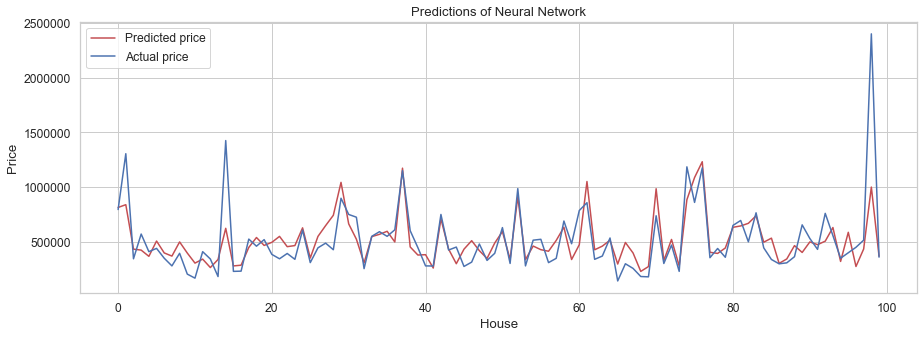

In [47]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(Y_test_regression[100:200], 'r')
plt.plot(T_test_regression[100:200], 'b')
plt.title('Predictions of Neural Network')
plt.xlabel('House')
plt.ylabel('Price')
plt.legend(['Predicted price', 'Actual price'])
plt.show()

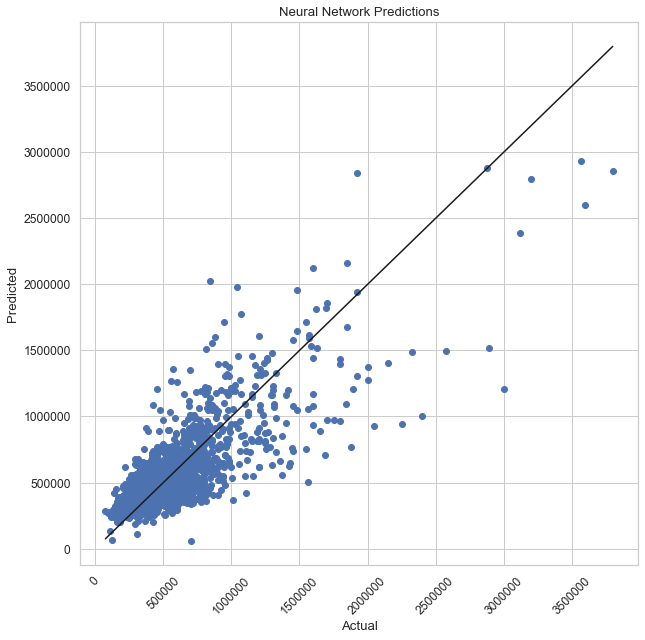

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(T_test_regression, Y_test_regression)
ax.plot([T_test_regression.min(), T_test_regression.max()], \
        [T_test_regression.min(), T_test_regression.max()], 'k-')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.xticks(rotation=45)
plt.title("Neural Network Predictions")
plt.show()

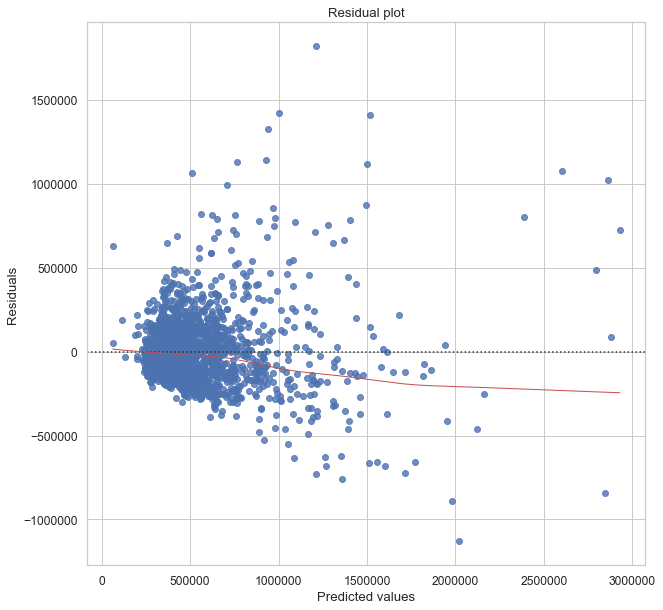

In [49]:
plt.figure(figsize=(10, 10))
sns.residplot(Y_test_regression.flatten(), T_test_regression.flatten(), lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

### Discussion of results: Nonlinear Regression
The neural network is definitely doing a good job of modeling the house prices, the predictions align well with the target values, as seen from the plot of actual and predicted values. 

However, the neural network is not doing a good job of modeling the values on the higher end. This makes sense since the data is skewed with more data points for lower house prices. This can be seen from both the comparison plot, which has outliers that are farther away from the line for a good fit, as well as from the residual plot, which clearly becomes negatives as the values increase, meaning the predictions are getting worse.

## III.C Nonlinear Logistic Regression

### Introduction: Nonlinear Logistic Regression
Nonlinear logistic regression using neural networks models nonlinear relations in the data and uses logistic regression to provide predictions. To emulate the NeuralNet class and update it for NeuralNetLogReg, we use the indicator target labels for training to update the weights for the linear model. For the error function, we can derive the gradient by switching the squared error with the negative log likelihood function. We use the softmax of the probabilities for the classes generated by the neural network to get classification results. 

In [50]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)
        
    def softmax(self, z):
        z = np.asarray(z)
        f = np.exp(z)
        return f / (np.sum(f, axis = 1, keepdims = True) if len(z.shape) == 2 else np.sum(f))

    def forward(self, X):
        x = X
        z = []
        
        for i in range(self._nLayers):
            z.append(x)
            if i == self._nLayers - 1:
                x = np.dot(self.add_ones(x), self._W[i])
                x = self.softmax(x)
            else:
                x = np.tanh(np.dot(self.add_ones(x), self._W[i]))
        return (x, z)

    def _objectf(self, T, Y, wpenalty):
        return - (np.sum(T*np.log(Y)) + wpenalty)

    def train(self, X, T, **params):
        NeuralNet.train(self, X, T, **params)
   
    def use(self, X):
        y, z = self.forward(X)
        L = np.argmax(y, 1)
        return y, L

### Code Explanation: Nonlinear Logistic Regression
We inherit the NeuralNet class for performing classification. The methods of this new class, called NeuralNetLogReg for logistic regression are explained below:
1. \_\_init__: constructs the NeuralNetLogReg class based on the NeuralNet class
2. softmax: calculates the softmax function
3. forward: performes the forward pass through the network, computing an extra step - the the softmax of the output
4. \_objectf: computes the log likelihood gradient for the objective function
5. train: trains the neural network
6. use: outputs predictions by choosing the class that has higher prediction

### Experiments with toy synthetic data

Text(0.5, 1.0, 'test data set')

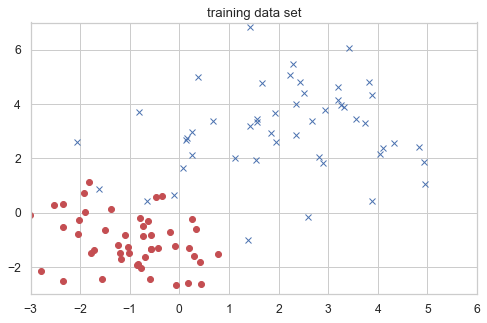

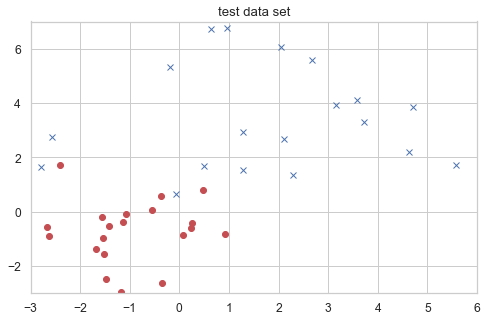

In [51]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2
mu1 = [-1, -1]
cov1 = np.eye(2)
mu2 = [2,3]
cov2 = np.eye(2) * 3

#  Train Data
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
Xtrains = (Xtrain - means) / stds


#  Test Data
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1
Xtests = (Xtest - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [52]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrains, Ttrain)
classes, Y = clsf.use(Xtests)

Accuracy:  99.5 %


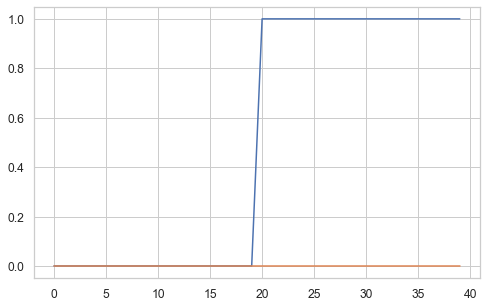

In [53]:
plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", (100 - np.mean(np.abs(Ttest - Y))), "%")

The code performs well on the toy data.

### Cross Validation for NeuralNetLogReg

In [54]:
final_acc_list = []
best_params_list = []

def CrossValidation(train_data, train_target, parameters, folds = 5):
    testing_data_size = int(len(train_data)/5)
    
    records = []
    params = []
    for fold in range(folds):
        test_fold_data = train_data[testing_data_size*(fold):testing_data_size*(fold+1)]
        test_fold_target = train_target[testing_data_size*(fold):testing_data_size*(fold+1)]
        
        a = train_data[:testing_data_size*(fold)]
        b = train_data[testing_data_size*(fold+1):]
        train_fold_data_interim = np.concatenate((a, b), axis=0)
        c = train_target[:testing_data_size*(fold)]
        d = train_target[testing_data_size*(fold+1):]
        train_fold_target_interim = np.concatenate((c, d), axis=0)
        
        for val_fold in range(folds-1):
            val_fold_data = train_fold_data_interim[testing_data_size*(val_fold):testing_data_size*(val_fold+1)]
            val_fold_target = train_fold_target_interim[testing_data_size*(val_fold):testing_data_size*(val_fold+1)]
            
            a = train_fold_data_interim[:testing_data_size*(val_fold)]
            b = train_fold_data_interim[testing_data_size*(val_fold+1):]
            train_fold_data = np.concatenate((a, b), axis=0)
            c = train_fold_target_interim[:testing_data_size*(val_fold)]
            d = train_fold_target_interim[testing_data_size*(val_fold+1):]
            train_fold_target = np.concatenate((c, d), axis=0)
            
            fscore_list = []
            param_list = []
            for p in parameters:
                model = NeuralNetLogReg(p)
                model.train(train_fold_data, train_fold_target)
                probs, preds = model.use(val_fold_data)

                val_acc = f1_score(val_fold_target, preds)
                fscore_list.append(val_acc)
                param_list.append(p)

            print('F-score: ', fscore_list)
            print('Params list: ', param_list)

            print('Max F-score: ', max(fscore_list))
            print('Max param: ', param_list[np.argmax(fscore_list)])
            records.append(max(fscore_list))
            params.append(param_list[np.argmax(fscore_list)])
        
        best_param = params[np.argmax(records)]
        best_model = NeuralNetLogReg(best_param)
        best_model.train(train_fold_data_interim, train_fold_target_interim)
        
        final_probs, final_preds = best_model.use(test_fold_data)
        final_acc = f1_score(test_fold_target, final_preds)
        
        final_acc_list.append(final_acc)
        best_params_list.append(best_param)
        
    return final_acc_list, best_params_list

In [55]:
from nn import NeuralNet
models = [[8, 10, 2], [8, 12, 2], [8, 14, 2], [8, 16, 2], [8, 18, 2]]
best_fscore, best_param_classification = CrossValidation(X_train_classification, \
                                                         T_train_classification, models)

F-score:  [0.663167104111986, 0.5376106194690264, 0.6694386694386695, 0.6694386694386695, 0.0]
Params list:  [[8, 10, 2], [8, 12, 2], [8, 14, 2], [8, 16, 2], [8, 18, 2]]
Max F-score:  0.6694386694386695
Max param:  [8, 14, 2]
F-score:  [0.6290773532152842, 0.0, 0.6727498963085856, 0.6727498963085856, 0.47501542257865514]
Params list:  [[8, 10, 2], [8, 12, 2], [8, 14, 2], [8, 16, 2], [8, 18, 2]]
Max F-score:  0.6727498963085856
Max param:  [8, 14, 2]
F-score:  [0.6622073578595317, 0.36079077429983525, 0.2875675675675676, 0.0, 0.061757719714964375]
Params list:  [[8, 10, 2], [8, 12, 2], [8, 14, 2], [8, 16, 2], [8, 18, 2]]
Max F-score:  0.6622073578595317
Max param:  [8, 10, 2]
F-score:  [0.0, 0.0, 0.0, 0.0, 0.023923444976076555]
Params list:  [[8, 10, 2], [8, 12, 2], [8, 14, 2], [8, 16, 2], [8, 18, 2]]
Max F-score:  0.023923444976076555
Max param:  [8, 18, 2]
F-score:  [0.2788671023965142, 0.0, 0.6610878661087867, 0.6590813316477033, 0.6610878661087867]
Params list:  [[8, 10, 2], [8, 12,

In [56]:
print('Best F-scores: ', best_fscore)
print('Best params: ', best_param_classification)

Best F-scores:  [0.0, 0.6694386694386695, 0.27995758218451755, 0.0, 0.6760446834919321]
Best params:  [[8, 14, 2], [8, 12, 2], [8, 12, 2], [8, 12, 2], [8, 12, 2]]


### Running with best parameters observed from cross validation
Cross Validation gave the best F-scores and the best parameters associated with them. Choosing the best F-score and the parameter that gave it for final classification...

In [61]:
model_lr = NeuralNetLogReg([8, 12, 2])
model_lr.train(X_train_classification, T_train_classification)
probs, Y_test_classification = model_lr.use(X_test_classification)

In [62]:
print('Testing accuracy:', accuracy_score(Y_test_classification, T_test_classification))
print('Testing precision: ', precision_score(Y_test_classification, T_test_classification))
print('Testing recall: ', recall_score(Y_test_classification, T_test_classification))
print('Testing F1 score: ', f1_score(Y_test_classification, T_test_classification))
tn, fp, fn, tp = confusion_matrix(Y_test_classification, T_test_classification).ravel()
print('Testing specificity: ', tn/(tn+fp))
print()
print('Classification report:\n', classification_report(Y_test_classification, T_test_classification))
print('Testing ROC AUC score: ', roc_auc_score(Y_test_classification, T_test_classification))

Testing accuracy: 0.504
Testing precision:  0.006091370558375634
Testing recall:  0.3157894736842105
Testing F1 score:  0.01195219123505976
Testing specificity:  0.5058051489146895

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.51      0.67      1981
           1       0.01      0.32      0.01        19

    accuracy                           0.50      2000
   macro avg       0.50      0.41      0.34      2000
weighted avg       0.98      0.50      0.66      2000

Testing ROC AUC score:  0.4107973112994501


### Visualization of Results for Nonlinear Logistic Regression using Neural Networks

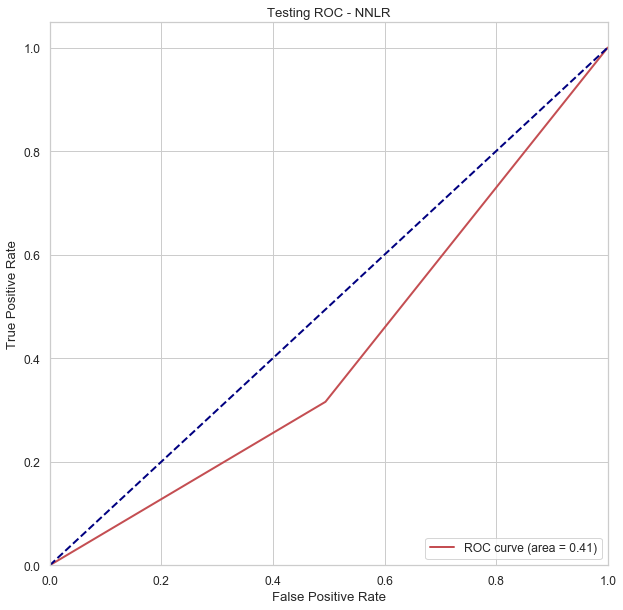

In [63]:
fpr, tpr, _ = roc_curve(Y_test_classification, T_test_classification)
plt.figure(figsize=(10, 10))
lw = 2
plt.plot(fpr, tpr, color='r', lw=lw, label='ROC curve (area = %0.2f)' 
         % roc_auc_score(Y_test_classification, T_test_classification))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing ROC - NNLR')
plt.legend(loc="lower right")
plt.show()

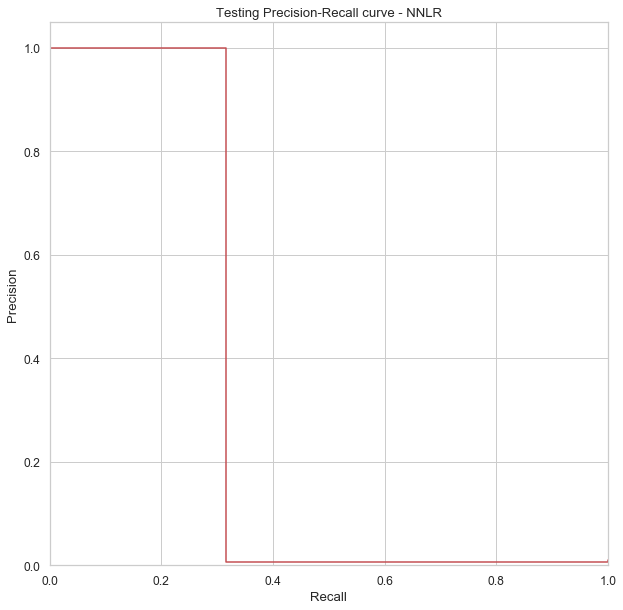

In [64]:
precision, recall, _ = precision_recall_curve(Y_test_classification, T_test_classification)
plt.figure(figsize=(10, 10))
plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Testing Precision-Recall curve - NNLR')
plt.show()

### Discussion of results: Nonlinear Logistic Regression
The NeuralNetLogReg class gives good predictions for both classes in binary classification. The ROC curve is quite close to the ideal, and the precision recall curve looks pretty balanced as well.

# Conclusion

## Parameters and network choice:
### Nonlinear Regression
The input layer consisted of 5 neurons, since the regression data had 5 features. The output layer had 1 neuron that gave the predictions. The hidden layer was varied from 10 to 18 to check which model could give good performance.
### Nonlinear Logistic Regression
The input layer consisted of 8 neurons, since the classification data had 8 features. The output layer had 2 neurons, one gave the probabilities, and one gave the predictions. The hidden layer was varied from 10 to 18 to check which model could give good performance.


## Overall
Both classes perform quite well on the given data. Cross validation helps select the best parameters to choose a model that would give a good testing accuracy without underfitting or overfitting.